In [1]:
import numpy as np
import matplotlib.colors
from matplotlib import cbook
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.patheffects import withStroke
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
def add_inner_title(ax, title, loc, **kwargs):
    prop = dict(
        path_effects=[withStroke(foreground="w", linewidth=3)],
        size=plt.rcParams["legend.fontsize"]
    )
    at = AnchoredText(
        title, loc=loc, prop=prop, pad=0.,
        borderpad=0.5, frameon=False, **kwargs
    )
    ax.add_artist(at)
    return at

In [3]:
# Prepare images
Z = cbook.get_sample_data("axes_grid/bivariate_normal.npy", np_load=True)
extent = (-3, 4, -4, 3)
ZS = [Z[i::3, :] for i in range(3)]
extent = extent[0], extent[1]/3., extent[2], extent[3]

vmax, vmin = np.max(ZS), np.min(ZS)
norm = matplotlib.colors.Normalize(vmax=vmax, vmin=vmin)

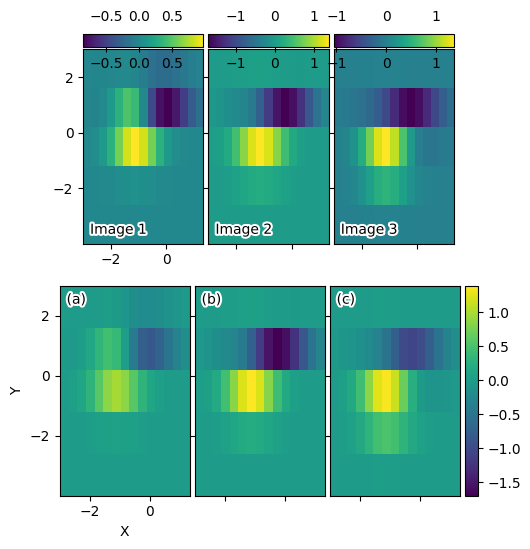

In [4]:
fig = plt.figure(figsize=(6, 6))

# *** Demo 1: colorbar at each axes ***
grid = ImageGrid(
    fig, 211,  # similar to subplot(211)
    nrows_ncols=(1, 3), axes_pad=0.05, label_mode="1", share_all=True,
    cbar_location="top", cbar_mode="each", cbar_size="7%", cbar_pad="1%",
)

for i, (ax, z) in enumerate(zip(grid, ZS)):
    im = ax.imshow(z, origin="lower", extent=extent)
    cb = ax.cax.colorbar(im)
    # Changing the colorbar ticks
    if i in [1, 2]:
        cb.set_ticks([-1, 0, 1])

for ax, im_title in zip(grid, ["Image 1", "Image 2", "Image 3"]):
    t = add_inner_title(ax, im_title, loc="lower left")
    t.patch.set_alpha(0.5)

for ax, z in zip(grid, ZS):
    ax.cax.toggle_label(True)

grid[0].set_xticks([-2, 0])
grid[0].set_yticks([-2, 0, 2])

# *** Demo 2: shared colorbar ***
grid2 = ImageGrid(
    fig, 212, nrows_ncols=(1, 3), axes_pad=0.05, label_mode="1", share_all=True,
    cbar_location="right", cbar_mode="single", cbar_size="10%", cbar_pad=0.05,
)

grid2[0].set_xlabel("X")
grid2[0].set_ylabel("Y")

for ax, z in zip(grid2, ZS):
    im = ax.imshow(z, norm=norm, origin="lower", extent=extent)

# With cbar_mode="single", cax attribute of all axes are identical.
ax.cax.colorbar(im)
ax.cax.toggle_label(True)

for ax, im_title in zip(grid2, ["(a)", "(b)", "(c)"]):
    t = add_inner_title(ax, im_title, loc="upper left")
    t.patch.set_ec("none")
    t.patch.set_alpha(0.5)

grid2[0].set_xticks([-2, 0])
grid2[0].set_yticks([-2, 0, 2])

plt.show()